In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import os
import random
import warnings
from tabulate import tabulate
# Importing problexity
import problexity as px

warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [2]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
folder("complexity")

In [6]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add
path="./"
files_add=find_the_way(path,'.csv')
files_add=['./MB-UDP-1.csv',
 './Mirai_FE.csv']

--------------------------------./MB-UDP-1.csv------------------------------------
Label
0      622
1    19378
dtype: int64
╔══════════════╦═════════════╦══════════╦════════════╦═══════════╗
║              ║   precision ║   recall ║   f1-score ║   support ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ 0            ║           1 ║        1 ║          1 ║       156 ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ 1            ║           1 ║        1 ║          1 ║       250 ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ accuracy     ║           1 ║        1 ║          1 ║         1 ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ macro avg    ║           1 ║        1 ║          1 ║       406 ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ weighted avg ║           1 ║        1 ║          1 ║       406 ║
╚══════════════╩═════════════╩══════════╩════════════╩═══════════╝
Speci

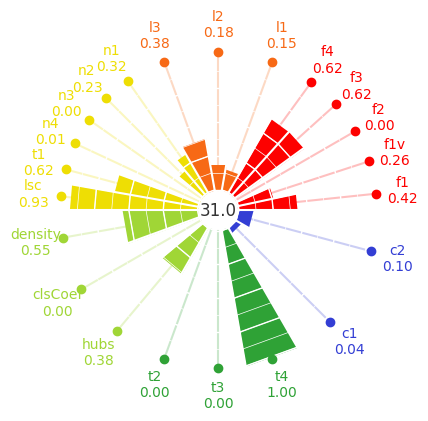





--------------------------------./Mirai_FE.csv------------------------------------
Label
0    121621
1    642516
dtype: int64
╔══════════════╦═════════════╦══════════╦════════════╦═══════════╗
║              ║   precision ║   recall ║   f1-score ║   support ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ 0            ║    0.539192 ║    0.908 ║   0.676602 ║   250     ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ 1            ║    0.708861 ║    0.224 ║   0.340426 ║   250     ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ accuracy     ║    0.566    ║    0.566 ║   0.566    ║     0.566 ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ macro avg    ║    0.624027 ║    0.566 ║   0.508514 ║   500     ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ weighted avg ║    0.624027 ║    0.566 ║   0.508514 ║   500     ║
╚══════════════╩═════════════╩══════════╩════════════╩═══════════╝

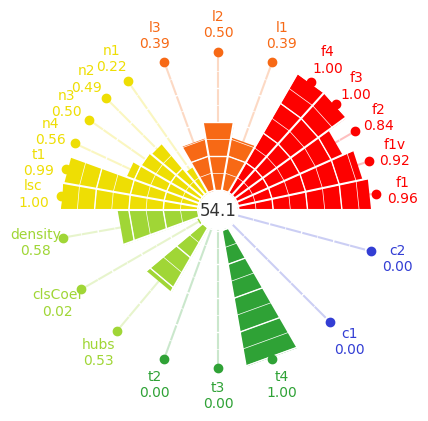

In [9]:


cols=["pck_size","Label"]
bos=pd.DataFrame()
bos["names"]=['f1',
 'f1v',
 'f2',
 'f3',
 'f4',
 'l1',
 'l2',
 'l3',
 'n1',
 'n2',
 'n3',
 'n4',
 't1',
 'lsc',
 'density',
 'clsCoef',
 'hubs',
 't2',
 't3',
 't4',
 'c1',
  'c2',"acc","f-score","kappa"]


f1=[]
names=[]
counter=0
csv=[["File","Attack","Normal","Dfl_Comp","Specia_Comp"]]
for file in files_add:
        satir=[file]
        print(f"--------------------------------{file}------------------------------------")
        df= pd.read_csv(file,usecols=cols)
        print(df.groupby("Label").size())
        anormal=df[df["Label"]==1]
        normal=df[df["Label"]==0]
        satir.append(len(anormal))
        satir.append(len(normal))
        if len (anormal)>1000:
            anormal=anormal.sample(n=1000,random_state=42)
        if len (normal)>1000:
            normal=normal.sample(n=1000,random_state=42)

        df =  pd.concat([anormal,normal])
        df=df.fillna(-1)
        y=df["Label"]
        del df["Label"]
        df['pck_size'] = df['pck_size'].astype(float)
        df['ters']=1/df['pck_size']
        #df['IP_proto'] = df['IP_proto'].astype(float)
        
        ml_list={"DT":DecisionTreeClassifier()}

        X=df.iloc[:,0:-1].values

       
        
        df["Label"]=y
        y = y.astype('category')
        y=y.cat.codes
        y=y.values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
          
        clf = ml_list["DT"]
        clf.fit(X_train, y_train)

        y_pred =clf.predict(X_test)
          
        df=classification_report(y_test, y_pred, output_dict=True)     
        df = pd.DataFrame(df).transpose()
        print(tabulate(df, headers='keys', tablefmt="double_grid"))
        
              
        f1=f1_score(y_test, y_pred, average='macro')
        acc=accuracy_score(y_test, y_pred)
        kappa=cohen_kappa_score(y_test, y_pred)


        cc = px.ComplexityCalculator()
        cc.fit(X,y)
        #colname=f"{file[9:-4]}"
        temp=list(cc.complexity)
        x=(temp[0]+temp[1]+temp[3]+temp[4]+temp[12]+temp[13])/6
        print("Special complexity: ", x)
        satir.append(cc.score())
        satir.append(x)
        print("Default complexity: ",cc.score())
        temp.append(acc)
        temp.append(f1)
        temp.append(kappa)
        bos[f"c_{file[2:-4]}"]=temp
        fig = plt.figure(figsize=(5,5))
        cc.plot(fig, (1,1,1))
        temp=file[3:].replace(".csv","._size_pdf")
        plt.savefig(f'./complexity/{temp}', format='pdf',bbox_inches='tight')
        csv.append(satir)
        plt.show()
        print(f"\n\n=================================================================================================\n\n")
    #except:pass
bos.to_csv("./complexity/sonuç.csv")



# Import matplotlib
import matplotlib.pyplot as plt

# Prepare figure


--------------------------------./MB-UDP-1.csv------------------------------------
Label
0      622
1    19378
dtype: int64
╔══════════════╦═════════════╦══════════╦════════════╦════════════╗
║              ║   precision ║   recall ║   f1-score ║    support ║
╠══════════════╬═════════════╬══════════╬════════════╬════════════╣
║ 0            ║    0.676056 ║ 0.615385 ║   0.644295 ║ 156        ║
╠══════════════╬═════════════╬══════════╬════════════╬════════════╣
║ 1            ║    0.772727 ║ 0.816    ║   0.793774 ║ 250        ║
╠══════════════╬═════════════╬══════════╬════════════╬════════════╣
║ accuracy     ║    0.738916 ║ 0.738916 ║   0.738916 ║   0.738916 ║
╠══════════════╬═════════════╬══════════╬════════════╬════════════╣
║ macro avg    ║    0.724392 ║ 0.715692 ║   0.719035 ║ 406        ║
╠══════════════╬═════════════╬══════════╬════════════╬════════════╣
║ weighted avg ║    0.735583 ║ 0.738916 ║   0.736339 ║ 406        ║
╚══════════════╩═════════════╩══════════╩════════════╩══════

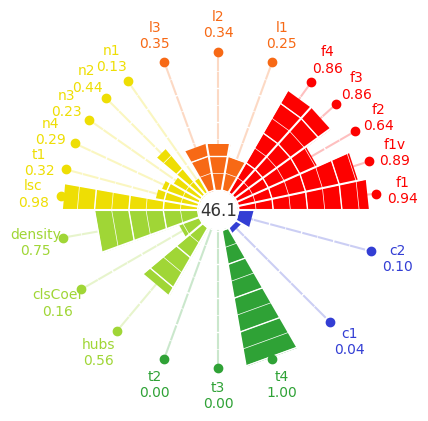





--------------------------------./Mirai_FE.csv------------------------------------
Label
0    121621
1    642516
dtype: int64
╔══════════════╦═════════════╦══════════╦════════════╦═══════════╗
║              ║   precision ║   recall ║   f1-score ║   support ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ 0            ║    0.932836 ║    1     ║   0.965251 ║   250     ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ 1            ║    1        ║    0.928 ║   0.962656 ║   250     ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ accuracy     ║    0.964    ║    0.964 ║   0.964    ║     0.964 ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ macro avg    ║    0.966418 ║    0.964 ║   0.963953 ║   500     ║
╠══════════════╬═════════════╬══════════╬════════════╬═══════════╣
║ weighted avg ║    0.966418 ║    0.964 ║   0.963953 ║   500     ║
╚══════════════╩═════════════╩══════════╩════════════╩═══════════╝

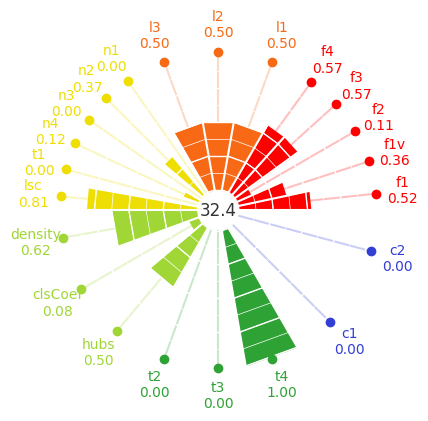

In [10]:
cols=["ts","Label"]
bos=pd.DataFrame()
bos["names"]=['f1',
 'f1v',
 'f2',
 'f3',
 'f4',
 'l1',
 'l2',
 'l3',
 'n1',
 'n2',
 'n3',
 'n4',
 't1',
 'lsc',
 'density',
 'clsCoef',
 'hubs',
 't2',
 't3',
 't4',
 'c1',
  'c2',"acc","f-score","kappa"]


f1=[]
names=[]
counter=0
csv=[["File","Attack","Normal","Dfl_Comp","Specia_Comp"]]
for file in files_add:
        satir=[file]
        print(f"--------------------------------{file}------------------------------------")
        df= pd.read_csv(file,usecols=cols)
        print(df.groupby("Label").size())
        anormal=df[df["Label"]==1]
        normal=df[df["Label"]==0]
        satir.append(len(anormal))
        satir.append(len(normal))
        if len (anormal)>1000:
            anormal=anormal.sample(n=1000,random_state=42)
        if len (normal)>1000:
            normal=normal.sample(n=1000,random_state=42)

        df =  pd.concat([anormal,normal])
        df=df.fillna(-1)
        y=df["Label"]
        del df["Label"]
        df['ts'] = df['ts'].astype(float)
        df['ters']=1/df['ts']
        #df['IP_proto'] = df['IP_proto'].astype(float)
        
        ml_list={"DT":DecisionTreeClassifier()}

        X=df.iloc[:,0:-1].values

       
        
        df["Label"]=y
        y = y.astype('category')
        y=y.cat.codes
        y=y.values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
          
        clf = ml_list["DT"]
        clf.fit(X_train, y_train)

        y_pred =clf.predict(X_test)
          
        df=classification_report(y_test, y_pred, output_dict=True)     
        df = pd.DataFrame(df).transpose()
        print(tabulate(df, headers='keys', tablefmt="double_grid"))
        
              
        f1=f1_score(y_test, y_pred, average='macro')
        acc=accuracy_score(y_test, y_pred)
        kappa=cohen_kappa_score(y_test, y_pred)


        cc = px.ComplexityCalculator()
        cc.fit(X,y)
        #colname=f"{file[9:-4]}"
        temp=list(cc.complexity)
        x=(temp[0]+temp[1]+temp[3]+temp[4]+temp[12]+temp[13])/6
        print("Special complexity: ", x)
        satir.append(cc.score())
        satir.append(x)
        print("Default complexity: ",cc.score())
        temp.append(acc)
        temp.append(f1)
        temp.append(kappa)
        bos[f"c_{file[2:-4]}"]=temp
        fig = plt.figure(figsize=(5,5))
        cc.plot(fig, (1,1,1))
        temp=file[3:].replace(".csv","_ts.pdf")
        plt.savefig(f'./complexity/{temp}', format='pdf',bbox_inches='tight')
        csv.append(satir)
        plt.show()
        print(f"\n\n=================================================================================================\n\n")
    #except:pass
bos.to_csv("./complexity/sonuç.csv")



# Import matplotlib
import matplotlib.pyplot as plt

# Prepare figure


In [5]:
kf = pd.DataFrame (csv[1:], columns = csv[0])

In [6]:
kf.to_csv("./comple.csv")

In [7]:
df= pd.read_csv("./complexity/sonuç.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
names,f1,f1v,f2,f3,f4,l1,l2,l3,n1,n2,...,clsCoef,hubs,t2,t3,t4,c1,c2,acc,f-score,kappa
c_\DoS-SYN-1,0.902023,0.821533,0.0,0.501,0.501,0.293036,0.4145,0.501,0.2605,0.469401,...,0.003645,0.5,0.0005,0.0005,1.0,0.0,0.0,1.0,1.0,1.0
c_\DoS-SYN-2,0.882666,0.789975,0.0,0.515,0.515,0.285969,0.5025,0.34,0.25025,0.466297,...,0.002698,0.5,0.0005,0.0005,1.0,0.0,0.0,0.984,0.983996,0.968
c_\DoS-SYN-3,0.954712,0.913348,0.0,0.5025,0.5025,0.36345,0.502,0.4035,0.287,0.473151,...,0.0005,0.5,0.0005,0.0005,1.0,0.0,0.0,0.994,0.994,0.988
c_\DoS-SYN-4,0.882034,0.788963,0.0,0.815,0.815,0.459047,0.5,0.5,0.25075,0.434709,...,0.0005,0.5,0.0005,0.0005,1.0,0.0,0.0,0.678,0.640752,0.356
c_\DoS-SYN-5,0.969113,0.940076,0.0,0.963,0.963,0.464878,0.5,0.5,0.251,0.492079,...,0.002856,0.5,0.0005,0.0005,1.0,0.0,0.0,0.534,0.404735,0.068
c_\DoS-SYN-6,0.978058,0.957059,0.0,0.9735,0.9735,0.33222,0.5,0.5,0.25075,0.494731,...,0.001945,0.5,0.0005,0.0005,1.0,0.0,0.0,0.52,0.376299,0.04
c_\MB-ACK-1,0.4878,0.322576,0.0,0.53,0.53,0.031008,0.032,0.018,0.25025,0.331468,...,0.003362,0.5,0.0005,0.0005,1.0,0.0,0.0,0.966,0.965961,0.932
c_\MB-ACK-2,0.557269,0.38626,0.0,0.5215,0.5215,0.113868,0.1285,0.0505,0.25025,0.323863,...,0.0005,0.5,0.0005,0.0005,1.0,0.0,0.0,0.99,0.989999,0.98
